In [5]:
# Importing The Packages.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [6]:
df = pd.read_csv(r'C:\Users\khatr\OneDrive\Desktop\USA_cars_datasets.csv')

In [7]:
# Display the first few rows of the dataset
print(df.head())

   Unnamed: 0  price      brand    model  year   title_status   mileage  \
0           0   6300     toyota  cruiser  2008  clean vehicle  274117.0   
1           1   2899       ford       se  2011  clean vehicle  190552.0   
2           2   5350      dodge      mpv  2018  clean vehicle   39590.0   
3           3  25000       ford     door  2014  clean vehicle   64146.0   
4           4  27700  chevrolet     1500  2018  clean vehicle    6654.0   

    color                  vin        lot       state country      condition  
0   black    jtezu11f88k007763  159348797  new jersey     usa   10 days left  
1  silver    2fmdk3gc4bbb02217  166951262   tennessee     usa    6 days left  
2  silver    3c4pdcgg5jt346413  167655728     georgia     usa    2 days left  
3    blue    1ftfw1et4efc23745  167753855    virginia     usa  22 hours left  
4     red    3gcpcrec2jg473991  167763266     florida     usa  22 hours left  


In [8]:
df.head().dtypes

Unnamed: 0        int64
price             int64
brand            object
model            object
year              int64
title_status     object
mileage         float64
color            object
vin              object
lot               int64
state            object
country          object
condition        object
dtype: object

In [9]:
# Get basic information about the datas
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2499 non-null   int64  
 1   price         2499 non-null   int64  
 2   brand         2499 non-null   object 
 3   model         2499 non-null   object 
 4   year          2499 non-null   int64  
 5   title_status  2499 non-null   object 
 6   mileage       2499 non-null   float64
 7   color         2499 non-null   object 
 8   vin           2499 non-null   object 
 9   lot           2499 non-null   int64  
 10  state         2499 non-null   object 
 11  country       2499 non-null   object 
 12  condition     2499 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 253.9+ KB


In [10]:
# Check for missing values
df.isnull().sum()

Unnamed: 0      0
price           0
brand           0
model           0
year            0
title_status    0
mileage         0
color           0
vin             0
lot             0
state           0
country         0
condition       0
dtype: int64

In [11]:
# Summary statistics for numerical features
df.describe()

Unnamed: 0         price         year       mileage           lot
count  2499.000000   2499.000000  2499.000000  2.499000e+03  2.499000e+03
mean   1249.000000  18767.671469  2016.714286  5.229869e+04  1.676914e+08
std     721.543484  12116.094936     3.442656  5.970552e+04  2.038772e+05
min       0.000000      0.000000  1973.000000  0.000000e+00  1.593488e+08
25%     624.500000  10200.000000  2016.000000  2.146650e+04  1.676253e+08
50%    1249.000000  16900.000000  2018.000000  3.536500e+04  1.677451e+08
75%    1873.500000  25555.500000  2019.000000  6.347250e+04  1.677798e+08
max    2498.000000  84900.000000  2020.000000  1.017936e+06  1.678055e+08

In [12]:
# Summary statistics for categorical features
print(df.describe(include=['O']))

       brand model   title_status  color                  vin         state  \
count   2499  2499           2499   2499                 2499          2499   
unique    28   127              2     49                 2495            44   
top     ford  door  clean vehicle  white    1gnevhkw8jj148388  pennsylvania   
freq    1235   651           2336    707                    2           299   

       country    condition  
count     2499         2499  
unique       2           47  
top        usa  2 days left  
freq      2492          832  


In [13]:
df.isna().sum()


Unnamed: 0      0
price           0
brand           0
model           0
year            0
title_status    0
mileage         0
color           0
vin             0
lot             0
state           0
country         0
condition       0
dtype: int64

In [14]:
#Find the duplicates

df.duplicated().sum()

0

In [15]:
df.drop(['Unnamed: 0','vin'],axis=1,inplace=True)
df.head()

price      brand    model  year   title_status   mileage   color  \
0   6300     toyota  cruiser  2008  clean vehicle  274117.0   black   
1   2899       ford       se  2011  clean vehicle  190552.0  silver   
2   5350      dodge      mpv  2018  clean vehicle   39590.0  silver   
3  25000       ford     door  2014  clean vehicle   64146.0    blue   
4  27700  chevrolet     1500  2018  clean vehicle    6654.0     red   

         lot       state country      condition  
0  159348797  new jersey     usa   10 days left  
1  166951262   tennessee     usa    6 days left  
2  167655728     georgia     usa    2 days left  
3  167753855    virginia     usa  22 hours left  
4  167763266     florida     usa  22 hours left

In [16]:
#unique valuesdf['Equipment'].unique()
df['price'].unique()
df['brand'].unique()
df['model'].unique()
df['year'].unique()
df['title_status'].unique()
df['mileage'].unique()
df['color'].unique()
df['lot'].unique()
df['state'].unique()
df['country'].unique()
df['condition'].unique()

array(['10 days left', '6 days left', '2 days left', '22 hours left',
       '20 hours left', '19 hours left', '3 days left', '21 hours left',
       '17 hours left', '2 hours left', '3 hours left', '34 minutes',
       '16 hours left', '18 hours left', '1 days left', '32 minutes',
       '14 hours left', '5 hours left', '4 days left', '9 days left',
       '23 hours left', '8 days left', '7 days left', '5 days left',
       '9 minutes', '1 minutes', '7 hours left', '16 minutes',
       '6 hours left', '1 hours left', 'Listing Expired', '13 days left',
       '24 hours left', '15 hours left', '53 minutes', '27 minutes',
       '12 days left', '15 days left', '30 minutes', '29 minutes',
       '28 minutes', '48 minutes', '11 days left', '4 hours left',
       '47 minutes', '12 hours left', '36 minutes'], dtype=object)

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'year'}>],
       [<Axes: title={'center': 'mileage'}>,
        <Axes: title={'center': 'lot'}>]], dtype=object)

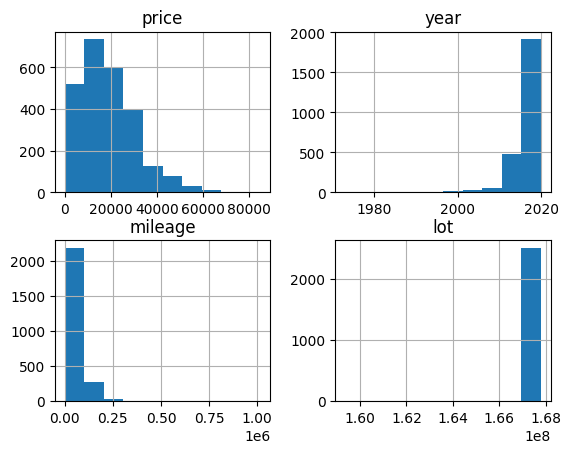

In [24]:
#Histogram.
df.hist()

Text(0, 0.5, 'No. of cars')

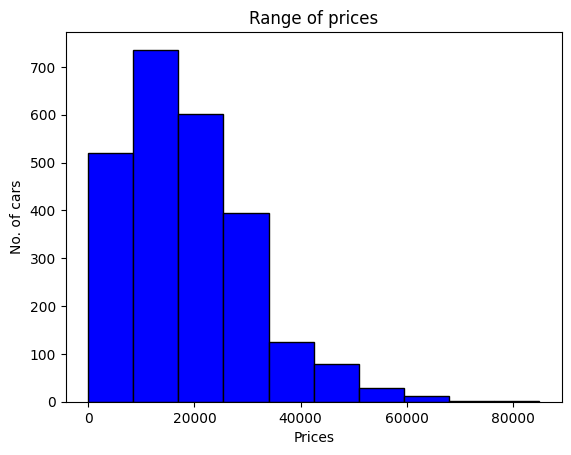

In [25]:
#Plotting a correlation, between No. of cars, and Prices.
plt.hist(df['price'], color = 'blue', edgecolor = 'black',bins=10)

# Add labels
plt.title('Range of prices')
plt.xlabel('Prices')
plt.ylabel('No. of cars')

(array([2492.,    0.,    0.,    0.,    0.,    7.]),
 array([0.        , 0.16666667, 0.33333333, 0.5       , 0.66666667,
        0.83333333, 1.        ]),
 <BarContainer object of 6 artists>)

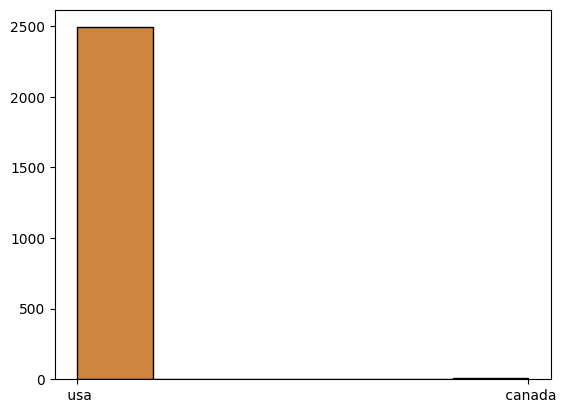

In [26]:
plt.hist(df['country'], color = 'peru', edgecolor = 'black',bins=6)

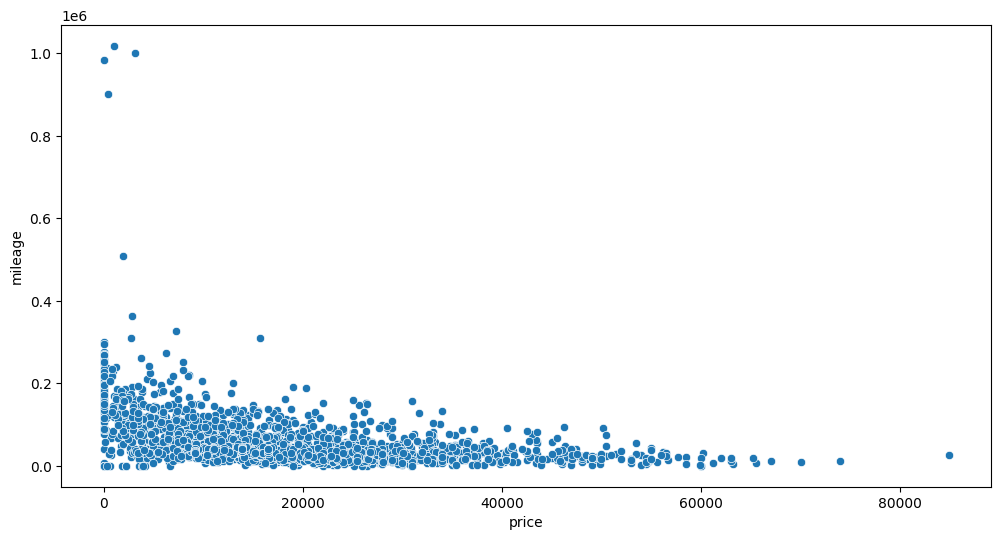

In [27]:
#Relation between the prices and the mileage given by the cars,using scatterplot.
plt.figure(figsize=(12,6))
sns.scatterplot(x=df['price'], y=df['mileage']);

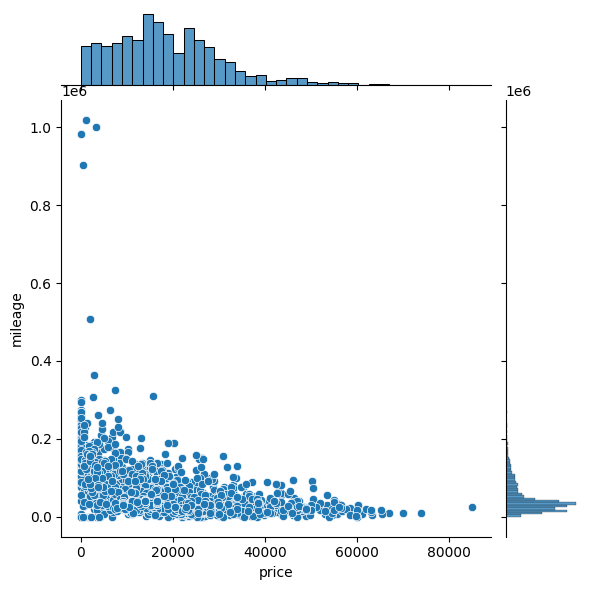

In [29]:
#same relation,with just different representation,using Jointplots.
sns.jointplot(x=df['price'], y=df['mileage']);

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27],
 [Text(0, 0, 'peterbilt'),
  Text(1, 0, 'heartland'),
  Text(2, 0, 'jaguar'),
  Text(3, 0, 'acura'),
  Text(4, 0, 'hyundai'),
  Text(5, 0, 'honda'),
  Text(6, 0, 'toyota'),
  Text(7, 0, 'mazda'),
  Text(8, 0, 'audi'),
  Text(9, 0, 'gmc'),
  Text(10, 0, 'jeep'),
  Text(11, 0, 'ram'),
  Text(12, 0, 'nissan'),
  Text(13, 0, 'kia'),
  Text(14, 0, 'infiniti'),
  Text(15, 0, 'dodge'),
  Text(16, 0, 'chevrolet'),
  Text(17, 0, 'lincoln'),
  Text(18, 0, 'chrysler'),
  Text(19, 0, 'buick'),
  Text(20, 0, 'mercedes-benz'),
  Text(21, 0, 'ford'),
  Text(22, 0, 'land'),
  Text(23, 0, 'cadillac'),
  Text(24, 0, 'bmw'),
  Text(25, 0, 'maserati'),
  Text(26, 0, 'lexus'),
  Text(27, 0, 'harley-davidson')])

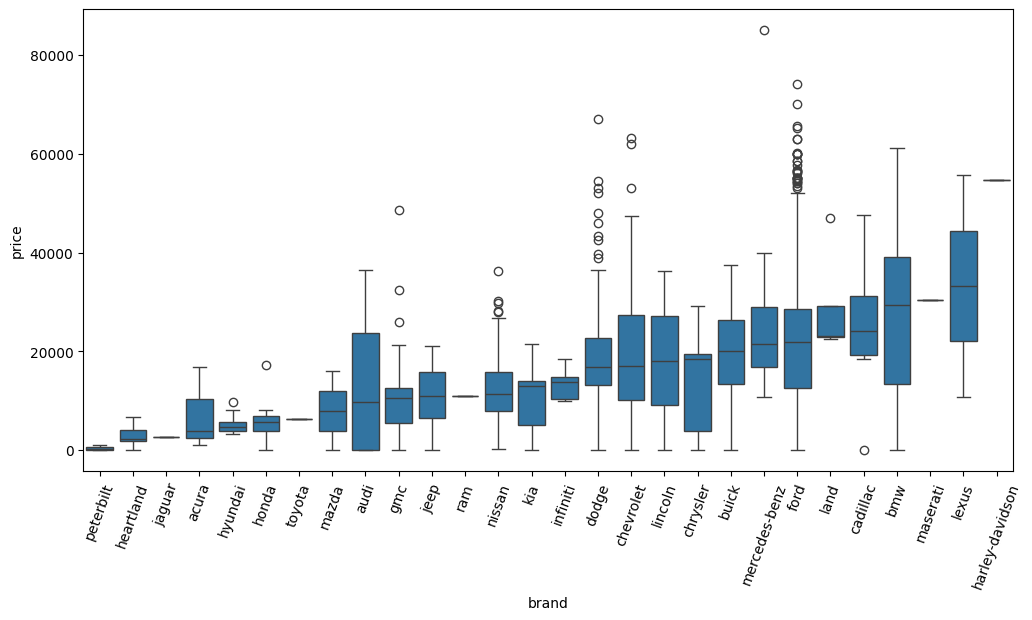

In [30]:
#Price range of various Models of cars,from the given dataset, using Seaborn Boxplot.
plt.figure(figsize=(12,6))
sorted_nb = df.groupby(['brand'])['price'].median().sort_values()
sns.boxplot(x=df['brand'], y=df['price'], order=list(sorted_nb.index))
plt.xticks(rotation=70)

<Axes: ylabel='state'>

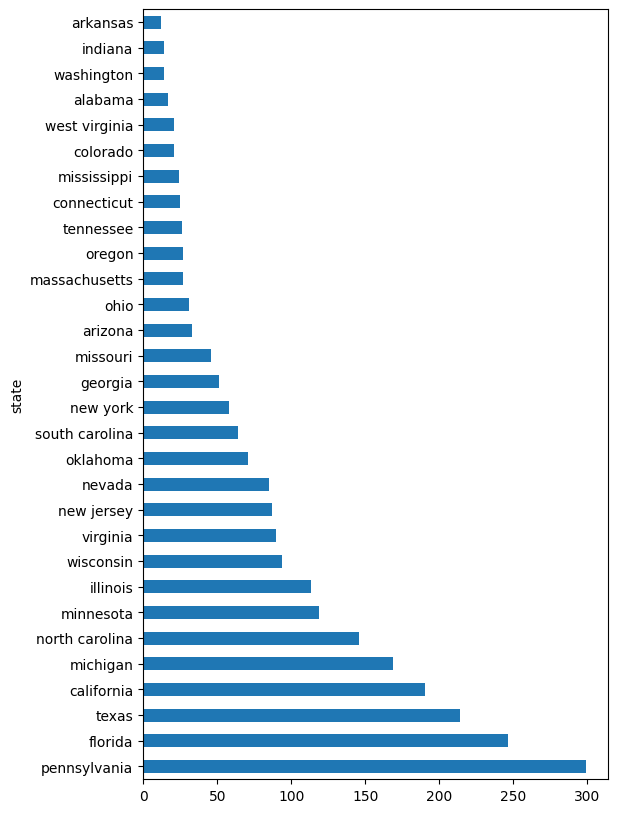

In [31]:
#How many cars,come from which state of USA, as well as Canada.
df['state'].value_counts().head(30).plot(kind='barh', figsize=(6,10))

(array([  0., 100., 200., 300., 400., 500., 600., 700., 800.]),
 [Text(0.0, 0, '0'),
  Text(100.0, 0, '100'),
  Text(200.0, 0, '200'),
  Text(300.0, 0, '300'),
  Text(400.0, 0, '400'),
  Text(500.0, 0, '500'),
  Text(600.0, 0, '600'),
  Text(700.0, 0, '700'),
  Text(800.0, 0, '800')])

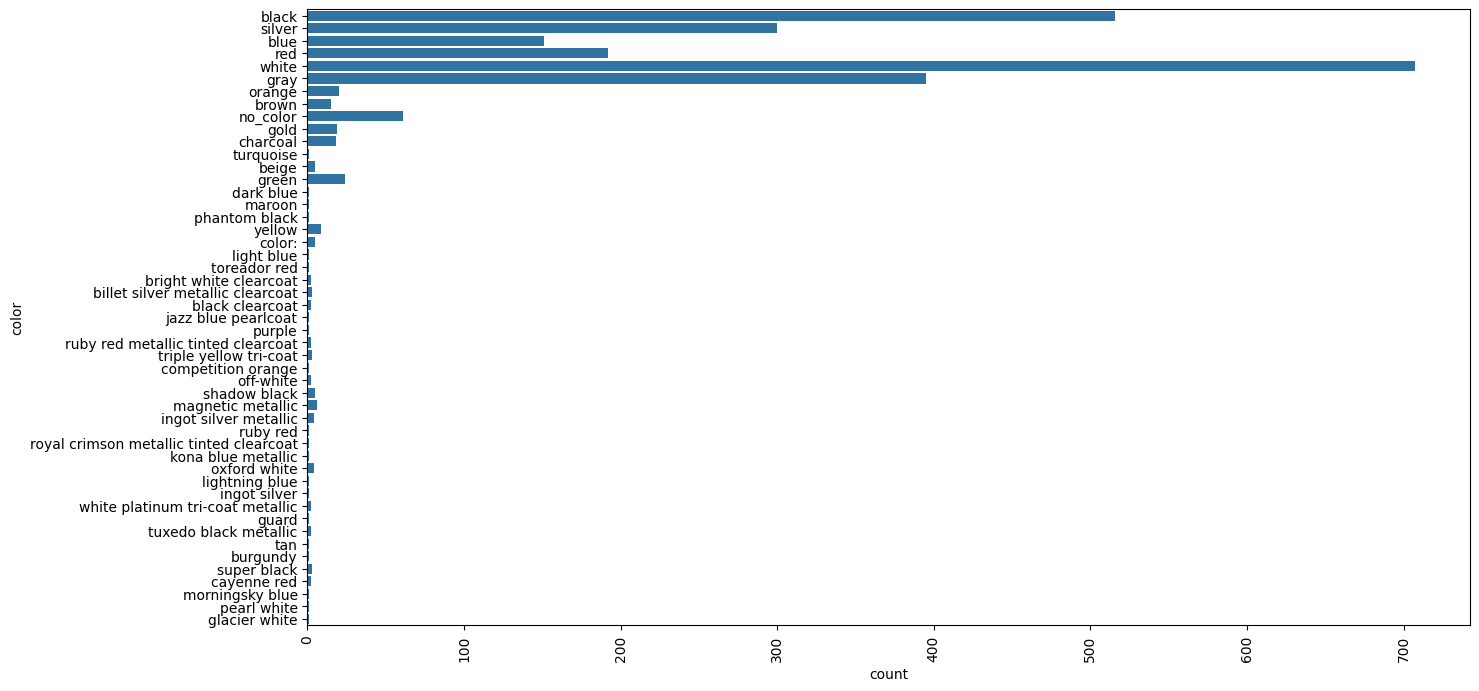

In [38]:
plt.figure(figsize=(15,8))
sns.countplot(df['color']);
plt.xticks(rotation=90)

ValueError: could not convert string to float: 'toyota'

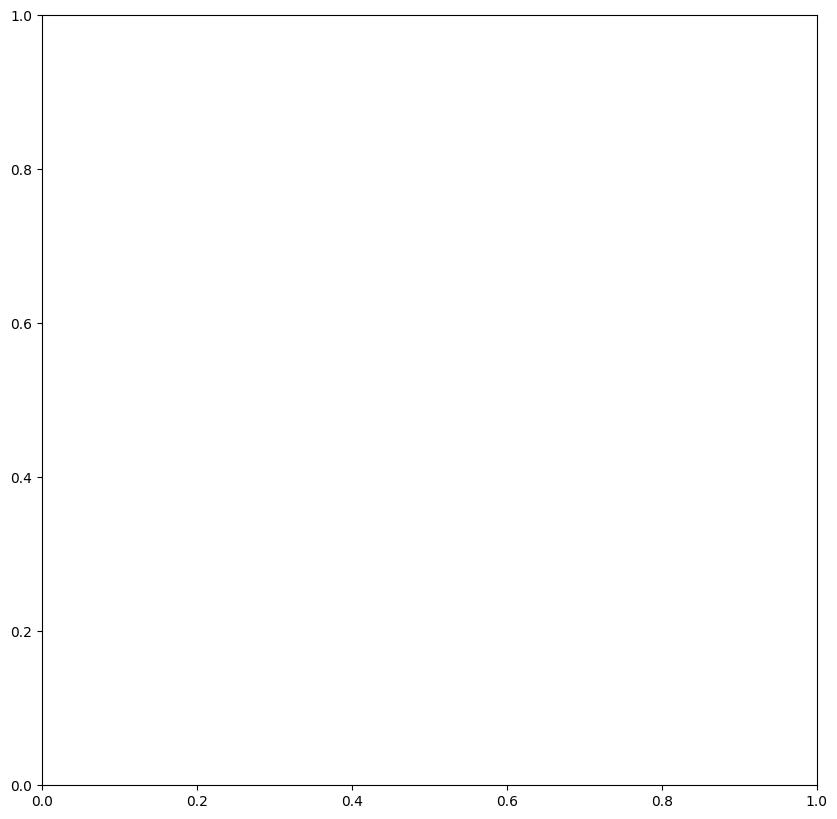

In [41]:
#correlation map
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

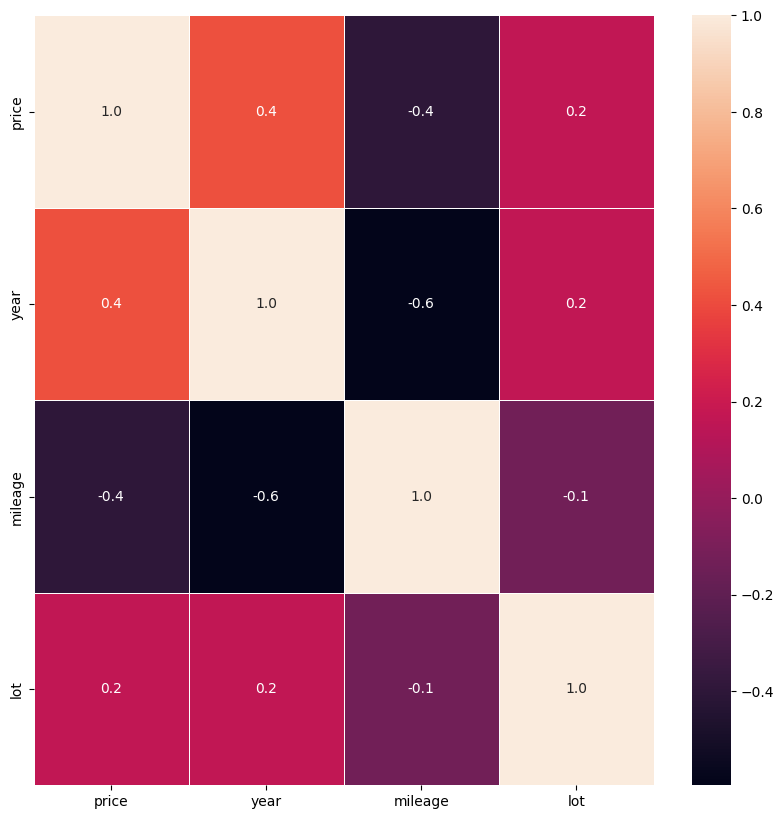

In [42]:
numeric_df = df.select_dtypes(include=[np.number])

#Compute the correlation matrix
corr_matrix = numeric_df.corr()

#Plot the heatmap
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, linewidths=.5, fmt='.1f', ax=ax)
plt.show()